In [1]:
import sys
print (sys.path)
! where python
! python --version
! python3 --version
! pip show matplotlib

['d:\\random_repos\\numerical-analysis', 'C:\\Users\\daniel\\AppData\\Local\\Programs\\Python\\Python310\\python310.zip', 'C:\\Users\\daniel\\AppData\\Local\\Programs\\Python\\Python310\\DLLs', 'C:\\Users\\daniel\\AppData\\Local\\Programs\\Python\\Python310\\lib', 'C:\\Users\\daniel\\AppData\\Local\\Programs\\Python\\Python310', 'd:\\random_repos\\numerical-analysis\\.venv', '', 'd:\\random_repos\\numerical-analysis\\.venv\\lib\\site-packages', 'd:\\random_repos\\numerical-analysis\\.venv\\lib\\site-packages\\win32', 'd:\\random_repos\\numerical-analysis\\.venv\\lib\\site-packages\\win32\\lib', 'd:\\random_repos\\numerical-analysis\\.venv\\lib\\site-packages\\Pythonwin']
D:\random_repos\numerical-analysis\.venv\Scripts\python.exe
C:\Users\daniel\AppData\Local\Programs\Python\Python310\python.exe
C:\Users\daniel\AppData\Local\Microsoft\WindowsApps\python.exe
Python 3.10.7


Python was not found; run without arguments to install from the Microsoft Store, or disable this shortcut from Settings > Manage App Execution Aliases.


Name: matplotlib
Version: 3.7.1
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: d:\random_repos\numerical-analysis\.venv\lib\site-packages
Requires: contourpy, cycler, fonttools, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: 


## Terminology

- **Trial**: single occurrence with an outcome that is uncertain until we observe it.
For example, rolling a single die.
- **Outcome**: possible result of a trial; one particular state of the world. What Laplace calls a case.
For example: 4.
- **Sample Space**: The set of all possible outcomes for the trial.
For example, $\{1, 2, 3, 4, 5, 6\}$.
- **Event**: subset of the sample space, a set of outcomes that together have some property we are interested in.
For example, the event "odd die roll" is the set of outcomes $\{1,3,5\}$.
- **Probability**: As Laplace said, the probability of an event with respect to
  a sample space is the "number of favorable cases" (outcomes from the sample
  space that are in the event) divided by the "number of all the cases" in the
  sample space (assuming "nothing leads us to expect that any one of these cases
  should occur more than any other"), so $P \in [0,1]$.
  For example, the probability of an odd die roll is $3/6 = 1/2$.
- **Frequency**: non-negative number describing how often an outcome occurs. Can be a count like 5, or a ratio like 1/6.
- **Distribution**: mapping from outcome to frequency of that outcome. We will allow sample spaces to be distributions. 
- **Probability Distribution**: distribution whose frequencies sum to 1. 


## Introduction

Sampling table: 
  * with replacement: we can pick the same item again (rolling dice, coin flip)
  * without replacement: cannot choose again (pick a ball, team player...)


  &nbsp; | Order matters | Order doesn't matter
---------|----------|---------
 Replace | $n^k$ | $n+k-1 \choose k$
 Don't replace | $\frac{n!}{(n - k)!}$ | ${n \choose k} = \frac{n!}{(n - k)! \times k!}$

### die rolling implementation

In [2]:
from fractions import Fraction

def P(event, space):
    "The probability of an event, given a sample space."
    return Fraction(cases(favorable(event, space)),cases(space))

favorable = set.intersection # Outcomes that are in the event and in the sample space
cases     = len              # The number of cases is the length, or size, of a set

D     = {1, 2, 3, 4, 5, 6} # a sample space
even  = {   2,    4,    6} # an event
# NB: intersected with sample space to get favorable outcomes
odd   = {1, 3, 5, 7, 9, 11, 13}
prime = {2, 3, 5, 7, 11, 13}

In [3]:
P(even, D)

Fraction(1, 2)

In [4]:
P(odd, D)

Fraction(1, 2)

In [5]:
P((even | prime), D) # The probability of an even or prime die roll

Fraction(5, 6)

In [6]:
P((odd & prime), D) # The probability of an odd prime die roll

Fraction(1, 3)

### Card problems

In [7]:
import itertools
import random

def combos(items, n):
    "All combinations of n items; each combo as a space-separated str."
    return list(set(map(' '.join, itertools.combinations(items, n))))

suits = u'♥♠♦♣'
ranks = u'AKQJT98765432'
deck  = [r + s for r in ranks for s in suits] # 52
# sample space of all 5-card combinations from deck
Hands = combos(deck, 5) # 2598960

In [8]:
random.sample(Hands, 7)


['J♦ T♥ 8♦ 7♣ 5♦',
 'A♦ J♠ 7♦ 6♠ 5♠',
 'T♥ T♦ 8♦ 2♠ 2♣',
 'T♥ 7♠ 5♥ 4♥ 2♠',
 'A♠ J♦ 9♣ 5♠ 2♣',
 'A♦ 7♥ 7♦ 6♦ 3♥',
 '8♦ 8♣ 6♠ 5♥ 5♣']

In [9]:
random.sample(deck, 7)

['9♦', '2♦', 'K♦', '9♠', 'J♠', '8♣', '5♠']

In [10]:
# 5 cards of the same suit
flush = {hand for hand in Hands if any(hand.count(suit) == 5 for suit in suits)}
P(flush, Hands)

Fraction(33, 16660)

In [11]:
four_kind = {hand for hand in Hands if any(hand.count(rank) == 4 for rank in ranks)}
P(four_kind, Hands) # e.g. 4 kings

Fraction(1, 4165)

## Urn Problems

> *An urn contains 6 blue, 9 red, and 8 white balls.  We select 6 balls at random. What is the probability of each of these  outcomes:*
> 
> - *All balls are red*.
> - *3 are blue, and 1 is red, and 2 are white, *.
> - *Exactly 4 balls are white*.

In [12]:
def balls(color, n):
    "A set of n numbered balls of the given color."
    return {color + str(i)
            for i in range(1, n + 1)}

urn = list(balls('B', 6) | balls('R', 9) | balls('W', 8))

U6 = combos(urn, 6) 
"""sample space (we select 6 random balls)"""

random.sample(U6, 1)

['R7 W2 R4 W5 W7 R1']

In [13]:
def select(color, n, space=U6):
    """
    The subset of the sample space with exactly `n` balls of given `color`.
    Example: `select('R', 6)` is the event of picking 6 red balls from the urn
    """
    return {s for s in space if s.count(color) == n}

In [14]:
# *All balls are red*.
P(select('R', 6), U6) 

Fraction(4, 4807)

In [15]:
# *3 are blue, and 1 is red, and 2 are white, *.
P(select('B', 3) & select('R', 1) & select('W', 2), U6)

Fraction(240, 4807)

In [16]:
# 4 balls (only) are white
P(select('W', 4), U6)


Fraction(350, 4807)

TODO: what about probability that 3 or more are white (not necessarily consecutive)? 

see
https://math.stackexchange.com/questions/1292902/the-probability-of-getting-at-least-5-balls-of-the-same-color-from-a-uniformly-d
which is basically the same exact problem.

we should first simplify the problem by grouping useless balls: i.e. combine blue
and red as "?".

The probability of any of the _+3 white balls_ event
(WWW???, ?W?WW?, ??WWW?, ...) is based on order matters without replacement




### Verifying urn calculations with arithmetic

Let's verify the first question of drawing exactly 6 red balls.

We need to first answer _how many ways can I choose 6 out of 9 red balls?_

$$
6 \choose 9
$$

If we care about the order in which they're drawn, the number of ways of choosing $k$ out of $n$ items is:

$$
\frac{n!}{(n - k)!}
$$

But if we don't care about the *order* of the six drawn balls, we can divide
that product by the number of permutations of 6 things, i.e. 6:

$$
\frac{n!}{(n - k)! \times k!} = {n \choose k}
$$





In [17]:
from math import factorial

def choose(n, k):
    "Number of ways to choose k items from a list of n items without taking order into account."
    return factorial(n) // (factorial(n - k) * factorial(k))

choose(9, 6)

84

In [18]:
N = len(U6)

# `P` computes a ratio and `choose` computes a count,
# so we can multiply the probability back by the denominator `cases(space)`, i.e. len(U6) 
# so that both are counts.
print(N * P(select('R', 6), U6) == choose(9, 6))
# which is just:
print(len(favorable(select('R', 6), U6)) == choose(9, 6))

True
True


In [19]:
# 3 are blue, and 1 is red, and 2 are white

N * P(select('B', 3) & select('W', 2) & select('R', 1), U6) == choose(6, 3) * choose(9, 1) * choose(8, 2) 

True

In [20]:
# 4 balls (only) are white
N * P(select('W', 4), U6) == choose(8, 4) * choose(6 + 9, 2)  # (6 + 9 non-white balls)

True

In [21]:
from collections import Counter
        
class Dist(Counter): 
    "A Distribution of {outcome: frequency} pairs."

# Changes to previous functions to allow use of distributions (via `Dist`):
#   - Sample spaces and events can both be specified as either a `set` or a `Dist`.
#   - The sample space can be a non-probability distribution like `Dist(H=50, T=50)`; the results
#   will be the same as if the sample space had been a true probability distribution like `Dist(H=1/2, T=1/2)`.
#   - `cases` now sums the frequencies in a distribution (it previously counted the length).
#   - `favorable` now returns a `Dist` of favorable outcomes and their frequencies (not a `set`).
#   - Redefines `Fraction` to use `"/"`, not `fractions.Fraction`, because frequencies might be floats.
#   - `P` is unchanged.

def cases(outcomes): 
    "The total frequency of all the outcomes."
    return sum(Dist(outcomes).values())

def favorable(event, space):
    "A distribution of outcomes from the sample space that are in the event."
    space = Dist(space)
    return Dist({x: space[x] 
                for x in space if x in event})

def Fraction(n, d): return n / d
    
# multiple ways to define a distribution
assert Dist(H=5, T=4) == Dist({'H': 5}, T=4) == Dist('TTTT', H=5) == Dist('THHHTTHHT')

# Example: probability of rolling an even number with a crooked die that is loaded to prefer 6:
Crooked = Dist({1: 0.1, 2: 0.1, 3: 0.1, 4: 0.1, 5: 0.1, 6: 0.5})
P(even, Crooked) # now using new versions of cases, favorable and Fraction


0.7

In [22]:
# vs getting an odd
P(odd, Crooked) # now using new versions of cases, favorable and Fraction


0.30000000000000004

> Allowing predicates to be used as events

To calculate the probability of an even die roll, we've been using

even = {2, 4, 6}

Which makes us alter the events if we were to change the die face number.

It is much more practical to allow events to be computed in this case and
redefine `favorable` once again:

In [23]:
def even(n): return n % 2 == 0

def favorable(event, space):
    "A distribution of outcomes from the sample space that are in the event."
    if callable(event):
        event = {x for x in space if event(x)}
    space = Dist(space)
    return Dist({x: space[x] 
                 for x in space if x in event})
    
favorable(even, D)

Dist({2: 1, 4: 1, 6: 1})

In [24]:
P(even, D)

0.5

The sample space (die) can also we computed dynamically:

In [25]:
def die(n): return set(range(1, n + 1))

favorable(even, die(12))

Dist({2: 1, 4: 1, 6: 1, 8: 1, 10: 1, 12: 1})

In [26]:
P(even, die(12))

0.5

In [27]:
P(even, die(2000))

0.5

In [28]:
P(even, die(2001))

0.49975012493753124

In [29]:
#
# Calculate the probability that the sum of rolling `d` 6-sided dice is prime:
#

def sum_dice(d): return Dist(sum(dice) for dice in itertools.product(D, repeat=d))

def is_prime(n): return (n > 1 and not any(n % i == 0 for i in range(2, n)))

for d in range(1, 9):
    p = P(is_prime, sum_dice(d))
    print(f"P(is_prime, sum_dice({d})) = {round(p, 3)}")

P(is_prime, sum_dice(1)) = 0.5
P(is_prime, sum_dice(2)) = 0.417
P(is_prime, sum_dice(3)) = 0.338
P(is_prime, sum_dice(4)) = 0.333
P(is_prime, sum_dice(5)) = 0.317
P(is_prime, sum_dice(6)) = 0.272
P(is_prime, sum_dice(7)) = 0.242
P(is_prime, sum_dice(8)) = 0.236


> Coin toss game (Fermat & Pascal)

Consider a gambling game consisting of tossing a coin repeatedly. 
Player H wins the game as soon as a total of 10 heads come up, and T wins if a
total of 10 tails come up before H wins. 
If the game is interrupted when H has 8 heads and T has 7 tails, 
how should the pot of money (which happens to be 100 Francs) be split?

In [30]:
def win_unfinished_game(h, t):
    "The probability that H will win the unfinished game, given the number of points `h` and `t` needed by H and T to win."
    return P(at_least(h, 'h'), finishes(h, t))

def at_least(n, item):
    "The event of getting at least n instances of item in an outcome."
    return lambda outcome: outcome.count(item) >= n
    
def finishes(h, t):
    "All finishes of a game where player H needs h points to win and T needs t."
    tosses = ['ht'] * (h + t - 1)
    return set(itertools.product(*tosses))

In [31]:
endings = finishes(2, 3) # current state, where H needs 2 coin tosses to win and T needs 3
# 16 equiprobable endings
endings

{('h', 'h', 'h', 'h'),
 ('h', 'h', 'h', 't'),
 ('h', 'h', 't', 'h'),
 ('h', 'h', 't', 't'),
 ('h', 't', 'h', 'h'),
 ('h', 't', 'h', 't'),
 ('h', 't', 't', 'h'),
 ('h', 't', 't', 't'),
 ('t', 'h', 'h', 'h'),
 ('t', 'h', 'h', 't'),
 ('t', 'h', 't', 'h'),
 ('t', 'h', 't', 't'),
 ('t', 't', 'h', 'h'),
 ('t', 't', 'h', 't'),
 ('t', 't', 't', 'h'),
 ('t', 't', 't', 't')}

In [32]:
# of which 11 are favorable to player H who needs 2 tosses
favorable(at_least(2, 'h'), endings)

Dist({('h', 'h', 't', 't'): 1,
      ('h', 't', 'h', 'h'): 1,
      ('h', 't', 'h', 't'): 1,
      ('h', 't', 't', 'h'): 1,
      ('t', 'h', 't', 'h'): 1,
      ('t', 'h', 'h', 'h'): 1,
      ('t', 'h', 'h', 't'): 1,
      ('t', 't', 'h', 'h'): 1,
      ('h', 'h', 'h', 'h'): 1,
      ('h', 'h', 't', 'h'): 1,
      ('h', 'h', 'h', 't'): 1})

In [33]:
# and of course only 16 - 11 are favorable to player T
favorable(at_least(3, 't'), endings)

Dist({('t', 't', 't', 'h'): 1,
      ('t', 't', 't', 't'): 1,
      ('h', 't', 't', 't'): 1,
      ('t', 'h', 't', 't'): 1,
      ('t', 't', 'h', 't'): 1})

In [34]:
# If we need to justly split 100 currency artefacts between the two players, H will get:
100 * win_unfinished_game(2, 3)

68.75

In [35]:
for t_tosses_to_win in reversed(range(10)):
    print(f"H needs 2 tosses, T needs {t_tosses_to_win} tosses - H gets: {round(100 * win_unfinished_game(2, t_tosses_to_win), 2)}%")

H needs 2 tosses, T needs 9 tosses - H gets: 98.93%
H needs 2 tosses, T needs 8 tosses - H gets: 98.05%
H needs 2 tosses, T needs 7 tosses - H gets: 96.48%
H needs 2 tosses, T needs 6 tosses - H gets: 93.75%
H needs 2 tosses, T needs 5 tosses - H gets: 89.06%
H needs 2 tosses, T needs 4 tosses - H gets: 81.25%
H needs 2 tosses, T needs 3 tosses - H gets: 68.75%
H needs 2 tosses, T needs 2 tosses - H gets: 50.0%
H needs 2 tosses, T needs 1 tosses - H gets: 25.0%
H needs 2 tosses, T needs 0 tosses - H gets: 0.0%



> Which of the following three propositions has the greatest chance of success? 
> 1. Six fair dice are tossed independently and at least one “6” appears. 
> 2. Twelve fair dice are tossed independently and at least two “6”s appear. 
> 3. Eighteen fair dice are tossed independently and at least three “6”s appear.

In [36]:
die6 = Dist({6: 1/6, '?': 5/6}) # we don't care about other possibilities

# dice rollings are independent from one another. So are coin flips. 
# Would not apply to e.g. removing balls from bags, etc. where order matters
# When order matters -> conditional probability is what we're looking at.
def joint(A, B, combine='{}{}'.format):
    """The joint distribution of two independent and identical distributions (IID). 
    Result is all entries of the form {'ab': frequency(a) * frequency(b)}"""
    return Dist({combine(a, b): A[a] * B[b]
                 for a in A for b in B})
    
def dice_prob(n, die):
    "Joint probability distribution from rolling `n` dice."
    if n == 1:
        return die
    else:
        return joint(die, dice_prob(n - 1, die))
    
dice_prob(4, die6)

Dist({'6666': 0.0007716049382716049,
      '666?': 0.0038580246913580245,
      '66?6': 0.0038580246913580245,
      '66??': 0.019290123456790126,
      '6?66': 0.0038580246913580245,
      '6?6?': 0.019290123456790126,
      '6??6': 0.019290123456790126,
      '6???': 0.09645061728395063,
      '?666': 0.0038580246913580245,
      '?66?': 0.019290123456790122,
      '?6?6': 0.019290123456790122,
      '?6??': 0.09645061728395063,
      '??66': 0.019290123456790122,
      '??6?': 0.09645061728395063,
      '???6': 0.09645061728395063,
      '????': 0.48225308641975323})

In [37]:
# going back to the original question:
print(P(at_least(1, '6'), dice_prob(6, die6)), "<-- we're better off rolling six dice and hoping for 1 six") 
print(P(at_least(2, '6'), dice_prob(12, die6)))
print(P(at_least(3, '6'), dice_prob(18, die6)))

0.665102023319616 <-- we're better off rolling six dice and hoping for 1 six
0.61866737373231
0.5973456859477678


Allen Downey's M&MS:

> The blue M&M was introduced in 1995.  Before then, the color mix in a bag of plain M&Ms was (30% Brown, 20% Yellow, 20% Red, 10% Green, 10% Orange, 10% Tan).  Afterward it > was (24% Blue , 20% Green, 16% Orange, 14% Yellow, 13% Red, 13% Brown). 
> A friend of mine has two bags of M&Ms, and he tells me that one is from 1994 and one from 1996.  He won't tell me which is which, but he gives me one M&M from each bag.  One > is yellow and one is green.  What is the probability that the yellow M&M came from the 1994 bag?

In [38]:
bag94 = Dist(brown=30, yellow=20, red=20, green=10, orange=10, tan=10)
bag96 = Dist(blue=24, green=20, orange=16, yellow=14, red=13, brown=13)
MM = joint(bag94, bag96, '94:{} 96:{}'.format)
MM

Dist({'94:brown 96:blue': 720,
      '94:brown 96:green': 600,
      '94:brown 96:orange': 480,
      '94:brown 96:yellow': 420,
      '94:brown 96:red': 390,
      '94:brown 96:brown': 390,
      '94:yellow 96:blue': 480,
      '94:yellow 96:green': 400,
      '94:yellow 96:orange': 320,
      '94:yellow 96:yellow': 280,
      '94:yellow 96:red': 260,
      '94:yellow 96:brown': 260,
      '94:red 96:blue': 480,
      '94:red 96:green': 400,
      '94:red 96:orange': 320,
      '94:red 96:yellow': 280,
      '94:red 96:red': 260,
      '94:red 96:brown': 260,
      '94:green 96:blue': 240,
      '94:green 96:green': 200,
      '94:green 96:orange': 160,
      '94:green 96:yellow': 140,
      '94:green 96:red': 130,
      '94:green 96:brown': 130,
      '94:orange 96:blue': 240,
      '94:orange 96:green': 200,
      '94:orange 96:orange': 160,
      '94:orange 96:yellow': 140,
      '94:orange 96:red': 130,
      '94:orange 96:brown': 130,
      '94:tan 96:blue': 240,
      '94:tan 96

In [39]:
# we observe that one is yellow and one is green (an event consisting of n outcomes from the sample space)
def yellow_and_green(outcome): return 'yellow' in outcome and 'green' in outcome

# note we now can pass a predicate to filter favorable outcomes from the event
favorable(yellow_and_green, MM)

Dist({'94:yellow 96:green': 400, '94:green 96:yellow': 140})

In [40]:
# What is the probability that the yellow M&M came from the 1994 bag? (event)
def yellow94(outcome): return '94:yellow' in outcome

# P now also accepts a predicate as event, since `favorable` is used underneath
P(yellow94, favorable(yellow_and_green, MM))

0.7407407407407407

Answering this question was straightforward: just like all the other probability
problems, we simply create a sample space, and use `P` to pick out the
probability of the event in question, given what we know about the outcome.

Of course, we *could* solve it using Bayes Theorem. 
Why is Bayes Theorem recommended? 
Because we are **asked about the probability of an outcome given the
evidence** &mdash; the probability the yellow came from the 94 bag, given that
there is a yellow and a green. But the problem statement doesn't directly tell
us the probability of that outcome given the evidence; it just tells us the
probability of the evidence given the outcome. 

Before we see the colors of the M&Ms, there are two hypotheses, `A` and `B`, both with equal probability:

    A: first M&M from 94 bag, second from 96 bag
    B: first M&M from 96 bag, second from 94 bag
    P(A) = P(B) = 0.5
    
Then we get some evidence:
    
    E: first M&M yellow, second green
    
We want to know the probability of hypothesis `A`, given the evidence:
    
    P(A | E)
    
That's not easy to calculate (except by enumerating the sample space, which our `P` function does). But Bayes Theorem says:
    
    P(A | E) = P(E | A) * P(A) / P(E)
    
The quantities on the right-hand-side are easier to calculate:
    
    P(E | A) = 0.20 * 0.20 = 0.04
    P(E | B) = 0.10 * 0.14 = 0.014
    P(A)     = 0.5
    P(B)     = 0.5
    P(E)     = P(E | A) * P(A) + P(E | B) * P(B) 
             = 0.04     * 0.5  + 0.014    * 0.5   =   0.027
    
And we can get a final answer:
    
    P(A | E) = P(E | A) * P(A) / P(E) 
             = 0.04     * 0.5  / 0.027 
             = 0.7407407407
             
You have a choice: Bayes Theorem allows you to do less calculation at the cost
of more algebra; that is a great trade-off if you are working with pencil and
paper. Enumerating the sample space allows you to do less algebra at the cost of
more calculation; usually a good trade-off if you have a computer. But
regardless of the approach you use, it is important to understand Bayes theorem
and how it works.


# The Central Limit Theorem 

In [41]:
%matplotlib inline 
import matplotlib.pyplot as plt
from statistics import mean
from random import normalvariate, triangular, choice, vonmisesvariate, uniform

def normal(mu=0, sigma=1): return random.normalvariate(mu, sigma)

def repeated_hist(dist, n=1_000_000, bins=100):
    "Sample the distribution n times and make a histogram of the results."
    samples = [dist() for _ in range(n)]
    plt.hist(samples, bins=bins, density=True)
    plt.title('{} (μ = {:.1f})'.format(dist.__name__, mean(samples)))
    plt.grid(axis='x')
    plt.yticks([], '')
    plt.show()

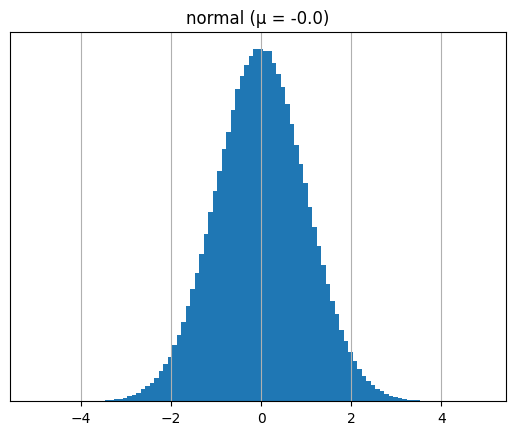

In [42]:
# Normal distribution
repeated_hist(normal)

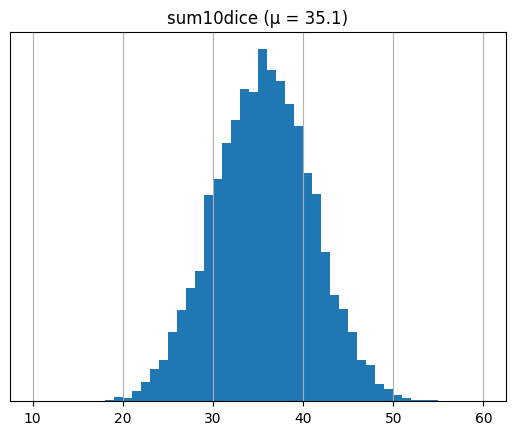

In [43]:
def sum10dice(): return sum(random.randint(1, 6) for _ in range(10))

# distribution of the sum of ten rolled dice. more tries (n) -> the more it resembles the normal distribution
repeated_hist(sum10dice, bins=range(10, 61), n=10000)

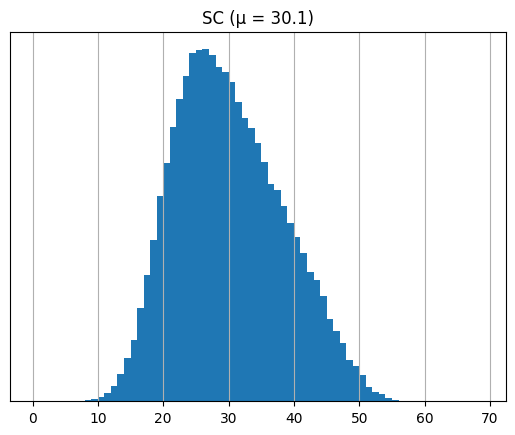

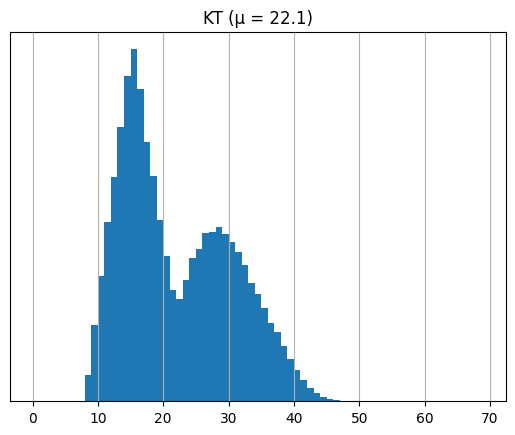

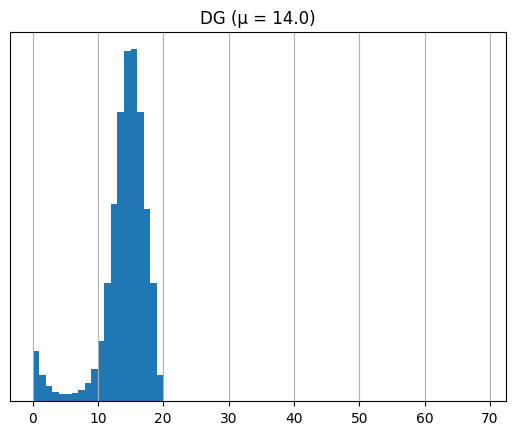

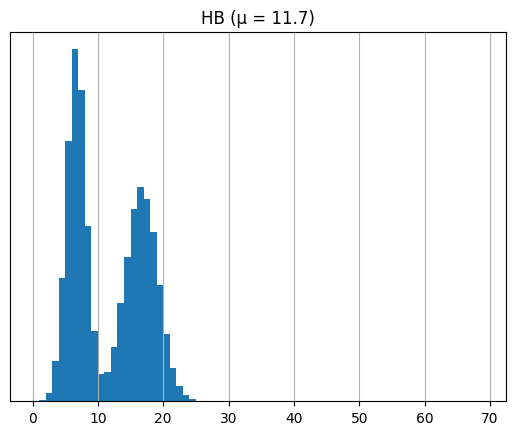

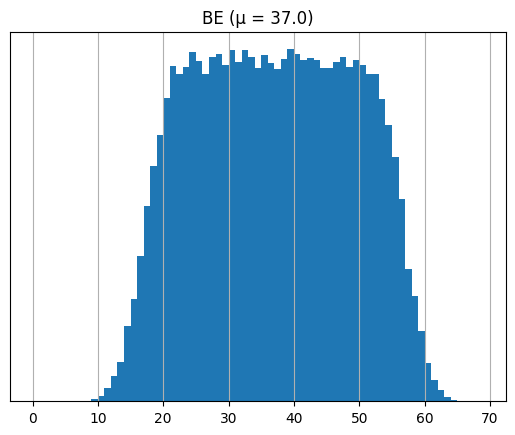

In [44]:
# As another example, let's take just *k* = 5 component distributions representing the 
# per-game scores of 5 basketball players, and then sum them together 
# to form the new distribution: the team score.

def SC(): return max(0, normal(12.1, 3) + 3 * triangular(1, 13, 4))                     # 30.1
def KT(): return max(0, triangular(8, 22, 15.3) + choice((0, 3 * triangular(1, 9, 4)))) # 22.1
def DG(): return max(0, vonmisesvariate(30, 2) * 3.08)                                  # 14.0
def HB(): return max(0, choice((normal(6.7, 1.5), normal(16.7, 2.5))))                  # 11.7
def BE(): return max(0, normal(17, 3) + uniform(0, 40))                                 # 37.0

team = (SC, KT, DG, HB, BE)

def Team(team=team): return sum(player() for player in team)

for player in team: 
    repeated_hist(player, bins=range(70), n=100000)

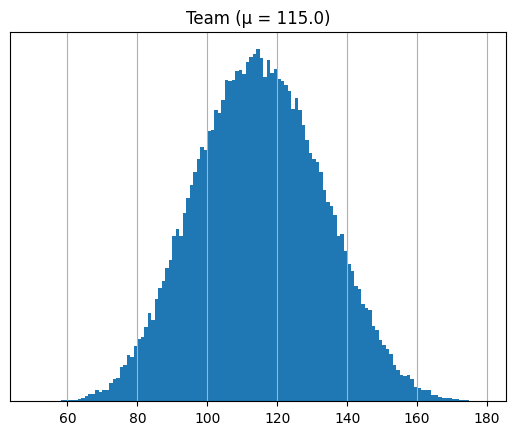

In [45]:
# We can see that none of the players above have a distribution that looks like a normal one.
# Now we define the team score to be the sum of the *k* = 5 players, and display this new distribution:

repeated_hist(Team, bins=range(50, 180), n=100000)

# The **Central Limit Theorem** is the ultimate limit of other distributions, and appears to hold true in this case as well.
# informally, the CLT is based on:
# - Gather *k* independent distributions. They need not be normal-shaped (like our basketball player's).
# - Define a new distribution to be the result of sampling one number from each of the *k* independent distributions and adding them up.
# - As long as *k* is not too small, and the component distributions are not super-pathological, then the new distribution will tend towards a normal distribution.


## Continuous Sample Spaces

>Two players go on a hot new game show called *Higher Number Wins.* The two go
>into separate booths, and each presses a button, and a random number between
>zero and one appears on a screen. (At this point, neither knows the other’s
>number, but they do know the numbers are chosen from a standard uniform
>distribution.) They can choose to keep that first number, or to press the
>button again to discard the first number and get a second random number, which
>they must keep. Then, they come out of their booths and see the final number
>for each player on the wall. The lavish grand prize — a case full of gold
>bullion — is awarded to the player who kept the higher number. 

Which number is the optimal cutoff for players to discard their first number and
choose another? 

Put another way, within which range should they choose to keep the first number,
and within which range should they reject it and try their luck with a second
number?

For example, if player **A** chooses a cutoff of *A* = 0.6, that means that **A** would accept any first number greater than 0.6, and reject any number below that cutoff. The question is: What cutoff, *A*, should player **A** choose to maximize the chance of winning, that is, maximize P(*a* > *b*)?

In [46]:
number = random.random # [0..1]

def strategy(cutoff):
    "Play the game with given cutoff, returning the first or second random number."
    first = number()
    return first if first > cutoff else number()

strategy(.5)

0.08030425842266853

In [47]:
def Pwin(A, B, trials=10000):
    "The probability that cutoff A wins against cutoff B."
    return mean(strategy(A) > strategy(B) 
                for _ in range(trials))
    
Pwin(0.6, 0.9)

0.554

In [48]:
from numpy import arange

def top(N, cutoffs):
    "Return the N best cutoffs and the number of opponent cutoffs they beat."
    winners = Counter(A if Pwin(A, B) > 0.5 else B
                      for (A, B) in itertools.combinations(cutoffs, 2))
    return winners.most_common(N)

top(10, arange(0.5, 1.0, 0.01))

# We get a good idea of the top cutoffs, but they are close to each other, so we can't quite be sure which is best, 
# only that the best is somewhere around 0.60. We could get a better estimate by increasing the number of trials, but that would consume more time.

[(0.6300000000000001, 44),
 (0.5900000000000001, 43),
 (0.5700000000000001, 42),
 (0.6200000000000001, 42),
 (0.54, 41),
 (0.55, 41),
 (0.5800000000000001, 41),
 (0.6000000000000001, 41),
 (0.6100000000000001, 41),
 (0.56, 41)]

### Exact Calculation

In [49]:
# see https://github.dev/norvig/pytudes/blob/main/ipynb/ProbabilitySimulation.ipynb
# spoiler, it's 0.618034. (https://en.wikipedia.org/wiki/Golden_ratio)

# Probability, Paradox, and the Reasonable Person Principle



In [50]:
#
# 
# required functions and some refactoring
#
#

from fractions import Fraction
import random
import itertools
import collections
from collections import Counter
import matplotlib.pyplot as plt

class ProbDist(dict):
    "A Probability Distribution; an {outcome: probability} mapping."
    def __init__(self, mapping=(), **kwargs):
        self.update(mapping, **kwargs)
        # Make probabilities sum to 1.0; assert no negative probabilities
        total = sum(self.values())
        for outcome in self:
            self[outcome] = self[outcome] / total
            assert self[outcome] >= 0
            
def P(event, space): 
    """The probability of an event, given a sample space of equiprobable outcomes. 
    event: a collection of outcomes, or a predicate that is true of outcomes in the event. 
    space: a set of outcomes or a probability distribution of {outcome: frequency}."""
    if is_predicate(event):
        event = such_that(event, space)
    if isinstance(space, ProbDist):
        return sum(space[o] for o in space if o in event)
    else:
        return Fraction(len(event & space), len(space))
    
def such_that(predicate, space): 
    """The outcomes in the sample space for which the predicate is true.
    If space is a set, return a subset {outcome,...};
    if space is a ProbDist, return a ProbDist {outcome: frequency,...};
    in both cases only with outcomes where predicate(element) is true."""
    if isinstance(space, ProbDist):
        return ProbDist({o:space[o] for o in space if predicate(o)})
    else:
        return {o for o in space if predicate(o)}
    
is_predicate = callable

def cross(A, B):
    "The set of ways of concatenating one item from collection A with one from B."
    return {a + b 
            for a in A for b in B}

def joint(A, B, sep=''):
    """The joint distribution of two independent probability distributions. 
    Result is all entries of the form {a+sep+b: P(a)*P(b)}"""
    return ProbDist({a + sep + b: A[a] * B[b]
                    for a in A
                    for b in B})

In [51]:
# solution to https://math.stackexchange.com/questions/1292902/the-probability-of-getting-at-least-5-balls-of-the-same-color-from-a-uniformly-d
import random 

dist = ProbDist(W=42, G=42, R=42)

# since we have >7 for every kind don't need to remove infeasible ones
S = {"".join(i) for i in itertools.product("BRW", repeat=7)}
print(random.sample(list(S), 3))

at_least_5_white = lambda outcome: outcome.count("W") >= 5

P(at_least_5_white, S)

['BBWBBWB', 'BWBBWBB', 'RWRRRBW']


Fraction(11, 243)

## Child paradox

>Mr. Smith has two children. At least one of them is a boy. What is
the probability that both children are boys? 

The question is ambigous, leading to possible answers based on the
interpretation. We need to know **HOW** we know one of them is a boy. i.e. we
need to know 

_a_: He is asked if at least one of his children is a boy. He replies "yes."
_b_: He is observed at a time when he is accompanied by one of his children,
chosen at random. The child is observed to be a boy. 

The sample space is different in both, since there are different outcomes.
Did we observe the oldest or youngest child in _b_?

In [52]:
def no_boys(outcome): return outcome.count('B') == 0
def one_boy(outcome): return outcome.count('B') == 1
def two_boys(outcome): return outcome.count('B') == 2
def three_boys(outcome): return outcome.count('B') == 3

def one_or_more_boys(outcome): return outcome.count('B') >= 1
def two_or_more_boys(outcome): return outcome.count('B') >= 2
def three_or_more_boys(outcome): return outcome.count('B') >= 3

def at_least_one_boy(outcome): return 'B' in outcome

def older_is_a_boy(outcome): return outcome.startswith('B')

def observed_boy(outcome): return 'b' in outcome

S_a = {'BG', 'BB', 'GB', 'GG'}
S_b = {'BB/b?', 'BB/?b', 
       'BG/b?', 'BG/?g', 
       'GB/g?', 'GB/?b', 
       'GG/g?', 'GG/?g'}

P_a = P(two_boys, such_that(at_least_one_boy, S_a))
P_b = P(two_boys, such_that(observed_boy, S_b))

print(f"""
{P_a=}
{P_b=}

{such_that(at_least_one_boy, S_a)=}
{such_that(observed_boy, S_b)=}

      """)




P_a=Fraction(1, 3)
P_b=Fraction(1, 2)

such_that(at_least_one_boy, S_a)={'BG', 'GB', 'BB'}
such_that(observed_boy, S_b)={'BG/b?', 'GB/?b', 'BB/?b', 'BB/b?'}

      


In [53]:
import itertools

# let's say it's 3 children now. At least 1 boy. Probability that 2 of them exactly are boys:
S_a = {'BBB', 'BBG', 'BGB', 'BGG', 'GBB', 'GBG', 'GGB', 'GGG'}
S_b = {
    'BBB/?bb',
    'BBB/b?b',
    'BBB/bb?',
    'BBG/?bg',
    'BBG/b?g',
    'BBG/bb?',
    'BGB/?gb',
    'BGB/b?b',
    'BGB/bg?',
    'BGG/?gg',
    'BGG/b?g',
    'BGG/bg?',
    'GBB/?bb',
    'GBB/g?b',
    'GBB/gb?',
    'GBG/?bg',
    'GBG/g?g',
    'GBG/gb?',
    'GGB/?gb',
    'GGB/g?b',
    'GGB/gg?',
    'GGG/?gg',
    'GGG/g?g',
    'GGG/gg?',
}


P_a = P(two_boys, such_that(at_least_one_boy, S_a))
P_b = P(two_boys, such_that(observed_boy, S_b))

print(f"""
{P_a=}
{P_b=} 

{such_that(at_least_one_boy, S_a)=}
{such_that(observed_boy, S_b)=}

      """)



P_a=Fraction(3, 7)
P_b=Fraction(1, 2) 

such_that(at_least_one_boy, S_a)={'BBG', 'BGG', 'GBG', 'GGB', 'GBB', 'BBB', 'BGB'}
such_that(observed_boy, S_b)={'GGB/g?b', 'GBB/g?b', 'GBG/gb?', 'BGB/b?b', 'GBB/?bb', 'GGB/?gb', 'GBG/?bg', 'BGB/bg?', 'BGG/b?g', 'BBG/?bg', 'BGB/?gb', 'BBG/b?g', 'BBB/b?b', 'GBB/gb?', 'BBB/?bb', 'BBB/bb?', 'BBG/bb?', 'BGG/bg?'}

      


In [54]:
# looking closely at _b_:

import math


# exactly n boys
P_no_boys=P(no_boys, such_that(observed_boy, S_b))
P_1_boy=P(one_boy, such_that(observed_boy, S_b))
P_2_boys=P(two_boys, such_that(observed_boy, S_b))
P_3_boys=P(three_boys, such_that(observed_boy, S_b))

print(f"""
{P_no_boys=} <-- clearly 0% since we observe 1 boy
{P_1_boy=}
{P_2_boys=}
{P_3_boys=}

{math.isclose(P_no_boys+P_1_boy+P_2_boys+P_3_boys, 1)=}
""")

# analytically it would be conditional probability. 
P_one_or_more_boys=P(one_or_more_boys, such_that(observed_boy, S_b))
P_two_or_more_boys=P(two_or_more_boys, such_that(observed_boy, S_b))
P_three_or_more_boys=P(three_or_more_boys, such_that(observed_boy, S_b))

print(f"""
{P_one_or_more_boys=} <-- clearly 100% since we observe 1 boy
{P_two_or_more_boys=}
{P_three_or_more_boys=}
""")
 


P_no_boys=Fraction(0, 1) <-- clearly 0% since we observe 1 boy
P_1_boy=Fraction(1, 3)
P_2_boys=Fraction(1, 2)
P_3_boys=Fraction(1, 6)

math.isclose(P_no_boys+P_1_boy+P_2_boys+P_3_boys, 1)=True


P_one_or_more_boys=Fraction(1, 1) <-- clearly 100% since we observe 1 boy
P_two_or_more_boys=Fraction(2, 3)
P_three_or_more_boys=Fraction(1, 6)



In [55]:
sexesdays = cross('BG', '1234567')
S3 = cross(sexesdays, sexesdays)
len(S3)

random.sample(list(S3), 4)

['B2G1', 'G5B1', 'B5G4', 'B1B7']

In [56]:
### Child Problem 3. One is a boy born on Tuesday. What's the probability  both are boys?

# Most people can not imagine how the boy's birth-day-of-week could be relevant, 
# and feel the answer should be the same as Problem 2.  
# But to be sure, we need to clearly describe the experiment, define the sample space, and calculate.  First:

# - **Child Experiment 3a.** A parent is chosen at random from families with two children. She is asked if at least one of her children is a boy born on Tuesday. She replies "yes."

S_a = {'BG', 'BB', 'GB', 'GG'}

# day of the week has no effect on the probability of having one boy, 2 boys...
assert P(at_least_one_boy, S3) == P(at_least_one_boy, S_a)
assert P(two_boys, S3) == P(two_boys, S_a)
assert P(two_boys, such_that(at_least_one_boy, S3)) == P(two_boys, such_that(at_least_one_boy, S_a))


In [57]:
def at_least_one_boy_tuesday(outcome): return 'B2' in outcome

P(two_boys, such_that(at_least_one_boy_tuesday, S3))

Fraction(13, 27)

13/27 is quite different from 1/3, but rather close to 1/2... We will prove and
visualize later.

Another interpretation for the problem, analogous to the one before:
    
A parent is chosen at random from families with two children. 
She is **observed** at a time when she is accompanied by one of her children, chosen at random.
The child is **observed** to be a boy who reports that his birth day is Tuesday.

We can represent outcomes in this sample space with a similar notation as before: `G1B3/??b3`, meaning the older child is a girl born on Sunday, the younger a boy born on Tuesday, the older was not observed, and the younger was.

In [58]:
def observed_boy_tues(outcome): return 'b2' in outcome
def observed_boy_wed(outcome): return 'b3' in outcome
def observed_boy_thu(outcome): return 'b4' in outcome

S3b = {children + '/' + observation
       for children in S3
       for observation in (children[:2].lower()+'??', '??'+children[-2:].lower())}    
     
random.sample(list(S3b), 5)           

['G4B6/g4??', 'G1B6/??b6', 'B2B4/b2??', 'G4B2/??b2', 'G7G1/g7??']

In [59]:
P(two_boys, such_that(observed_boy_tues, S3b))

Fraction(1, 2)

In [60]:
# unsurprisingly, days of the week have no influence since we assume it's equiprobable
assert P(two_boys, such_that(observed_boy_tues, S3b)) \
    == P(two_boys, such_that(observed_boy_wed, S3b)) \
    == P(two_boys, such_that(observed_boy_thu, S3b))
        

In [61]:
# proving 13/27 paradox

from IPython.display import HTML

def Pgrid(space, n, event, condition):
    """Display sample space in a grid, color-coded: green if event and condition is true; 
    yellow if only condition is true; white otherwise."""
    # n is the number of characters that make up the older child.
    olders = sorted(set(outcome[:n] for outcome in space))
    return HTML('<table>' +
                cat(row(older, space, event, condition) for older in olders) +
                '</table>' + 
                '<tt>P({} | {}) = {}</tt>'.format(
                event.__name__, condition.__name__, 
                P(event, such_that(condition, space))))

def row(older, space, event, condition):
    "Display a row where an older child is paired with each of the possible younger children."
    thisrow = sorted(outcome for outcome in space if outcome.startswith(older))
    return '<tr>' + cat(cell(outcome, event, condition) for outcome in thisrow) + '</tr>'

def cell(outcome, event, condition): 
    "Display outcome in appropriate color."
    color = ('lightgreen' if event(outcome) and condition(outcome) else
             'yellow' if condition(outcome) else
             'white')
    return '<td style="background-color: {}">{}</td>'.format(color, outcome)    

cat = ''.join

In [62]:
# Child Problem 1
Pgrid(S_a, 1, two_boys, older_is_a_boy)

BB,BG
GB,GG


In [63]:
Pgrid(S_a, 1, two_boys, at_least_one_boy)


BB,BG
GB,GG


In [64]:
# Child Problem  with days of week enumerated
Pgrid(S3, 2, two_boys, at_least_one_boy)

B1B1,B1B2,B1B3,B1B4,B1B5,B1B6,B1B7,B1G1,B1G2,B1G3,B1G4,B1G5,B1G6,B1G7
B2B1,B2B2,B2B3,B2B4,B2B5,B2B6,B2B7,B2G1,B2G2,B2G3,B2G4,B2G5,B2G6,B2G7
B3B1,B3B2,B3B3,B3B4,B3B5,B3B6,B3B7,B3G1,B3G2,B3G3,B3G4,B3G5,B3G6,B3G7
B4B1,B4B2,B4B3,B4B4,B4B5,B4B6,B4B7,B4G1,B4G2,B4G3,B4G4,B4G5,B4G6,B4G7
B5B1,B5B2,B5B3,B5B4,B5B5,B5B6,B5B7,B5G1,B5G2,B5G3,B5G4,B5G5,B5G6,B5G7
B6B1,B6B2,B6B3,B6B4,B6B5,B6B6,B6B7,B6G1,B6G2,B6G3,B6G4,B6G5,B6G6,B6G7
B7B1,B7B2,B7B3,B7B4,B7B5,B7B6,B7B7,B7G1,B7G2,B7G3,B7G4,B7G5,B7G6,B7G7
G1B1,G1B2,G1B3,G1B4,G1B5,G1B6,G1B7,G1G1,G1G2,G1G3,G1G4,G1G5,G1G6,G1G7
G2B1,G2B2,G2B3,G2B4,G2B5,G2B6,G2B7,G2G1,G2G2,G2G3,G2G4,G2G5,G2G6,G2G7
G3B1,G3B2,G3B3,G3B4,G3B5,G3B6,G3B7,G3G1,G3G2,G3G3,G3G4,G3G5,G3G6,G3G7
G4B1,G4B2,G4B3,G4B4,G4B5,G4B6,G4B7,G4G1,G4G2,G4G3,G4G4,G4G5,G4G6,G4G7


In [65]:
Pgrid(S3, 2, two_boys, at_least_one_boy_tuesday)

B1B1,B1B2,B1B3,B1B4,B1B5,B1B6,B1B7,B1G1,B1G2,B1G3,B1G4,B1G5,B1G6,B1G7
B2B1,B2B2,B2B3,B2B4,B2B5,B2B6,B2B7,B2G1,B2G2,B2G3,B2G4,B2G5,B2G6,B2G7
B3B1,B3B2,B3B3,B3B4,B3B5,B3B6,B3B7,B3G1,B3G2,B3G3,B3G4,B3G5,B3G6,B3G7
B4B1,B4B2,B4B3,B4B4,B4B5,B4B6,B4B7,B4G1,B4G2,B4G3,B4G4,B4G5,B4G6,B4G7
B5B1,B5B2,B5B3,B5B4,B5B5,B5B6,B5B7,B5G1,B5G2,B5G3,B5G4,B5G5,B5G6,B5G7
B6B1,B6B2,B6B3,B6B4,B6B5,B6B6,B6B7,B6G1,B6G2,B6G3,B6G4,B6G5,B6G6,B6G7
B7B1,B7B2,B7B3,B7B4,B7B5,B7B6,B7B7,B7G1,B7G2,B7G3,B7G4,B7G5,B7G6,B7G7
G1B1,G1B2,G1B3,G1B4,G1B5,G1B6,G1B7,G1G1,G1G2,G1G3,G1G4,G1G5,G1G6,G1G7
G2B1,G2B2,G2B3,G2B4,G2B5,G2B6,G2B7,G2G1,G2G2,G2G3,G2G4,G2G5,G2G6,G2G7
G3B1,G3B2,G3B3,G3B4,G3B5,G3B6,G3B7,G3G1,G3G2,G3G3,G3G4,G3G5,G3G6,G3G7
G4B1,G4B2,G4B3,G4B4,G4B5,G4B6,G4B7,G4G1,G4G2,G4G3,G4G4,G4G5,G4G6,G4G7


We see there are 27 relevant outcomes, of which 13 are green. So 13/27 really
does seem to be the right answer. 

This picture also gives us a way to think about why the answer is not 1/3. 
Think of the yellow-plus-green area as a horizontal stripe and a vertical
stripe, with an overlap. 

Each stripe is half yellow and half green, so if there
were no overlap at all, the probability of green would be 1/2.  When each stripe
takes up half the sample space and the overlap is maximal, the probability is
1/3. And in the Problem 3 table, where the overlap is small, the probability is
close to 1/2 (but slightly smaller).


One way to look at it is that if I tell you very specific information (such as a
boy born on Tuesday), it is unlikely that this applies to both children, so we
have smaller overlap and a probability closer to 1/2, but if I give you broad
information (a boy), this is more likely to apply to either child, resulting in
a larger overlap, and a probability closer to 1/3.


## The Sleeping Beauty Paradox

>Sleeping Beauty volunteers to undergo the following experiment and is told all of the following details: On Sunday she will be put to sleep. Then a fair coin will be tossed,
to determine which experimental procedure to undertake:
- Heads: Beauty will be awakened and interviewed on Monday only.
- Tails: Beauty will be awakened and interviewed on Monday and Tuesday only.

> In all cases she is put back to sleep with an amnesia-inducing drug.
> In any case, she will be awakened on Wednesday without interview and the
> experiment ends. Any time Beauty is awakened and interviewed, she is asked, 
> "What is your belief now for the proposition that the coin landed heads?"

In [66]:
B = {
    'heads/Monday/interviewed',  # outcome where the coin flip was heads, it is Monday, and she is interviewed
    'heads/Tuesday/sleep',
    'tails/Monday/interviewed', 
    'tails/Tuesday/interviewed',
    }

def T(property):
    "Return a predicate that is true of all outcomes that have 'property' as a substring."
    return lambda outcome: property in outcome

P(T("heads"), such_that(T("interviewed"), B))

Fraction(1, 3)

This problem is considered a paradox because there are people who argue that the answer should be 1/2, not 1/3. I admit I'm having difficulty coming up with a sample space that supports the "halfer" position. 

I do know of a question that has the answer 1/2:

`P(T("heads"), B)` is `Fraction(1, 2)`

But that seems like the wrong question; we want the probability of heads given that Sleeping Beauty was interviewed, not the unconditional probability of heads.

The "halfers" argue that before Sleeping Beauty goes to sleep, her unconditional probability for heads should be 1/2. When she is interviewed, she doesn't know anything more than before she went to sleep, so nothing has changed, so the probability of heads should still be 1/2. I find two flaws with this argument. First, if you want to convince me, show me a sample space; don't just make philosophical arguments. (Although a philosophical argument can be employed to help you define the right sample space.) Second, while I agree that before she goes to sleep, Beauty's *unconditional* probability for heads should be 1/2, I would say that both before she goes to sleep and when she is awakened, her *conditional* probability of heads *given that she is being interviewed* should be 1/3, as shown by the sample space.

## Monty Hall problem

Suppose you're on a game show, and you're given the choice of three doors:
Behind one door is a car; behind the others, goats. You pick a door, say No. 1,
and the host, who knows what's behind the doors, opens another door, say No. 3,
which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it
to your advantage to switch your choice?

> Yes. 2/3 chances of winning vs 1/3 if not switching.

Vos Savant suggests that the solution will be more intuitive with 1,000,000
doors rather than 3. In this case, there are 999,999 doors with goats behind
them and one door with a prize. After the player picks a door, the host opens
999,998 of the remaining doors. On average, in 999,999 times out of 1,000,000,
the remaining door will contain the prize.

Intuitively, the player should ask
**how likely it is that, given a million doors, they managed to pick the right one
initially**.




## The Ellsburg Paradox

> An urn contains 33 red balls and 66 other balls that are either black or yellow. You don't know the mix of black and yellow, just that they total 66. A single ball is drawn at random. You are asked which of these two gambles you would prefer:
- **R**: Win 100 for a red ball.
- **B**: Win 100 for a black ball.

> Separately, you are also asked which of these two gambles you prefer:
- **RY**: Win 100 for a red or yellow ball.
- **BY**: Win 100 for a black or yellow ball.

In [67]:
# Expected utility is the expected value in terms of the utility produced by an action. 
# It is the sum of the utility of each of its possible consequences, 
# individually weighted by their respective probability of occurrence.
#
# A rational decision maker will, when presented with a choice, 
# take the action with the greatest expected utility.

def EU(P, U):
    "The expected utility of a probability distribution, given a utility function."
    return sum(P[e] * U(e) 
               for e in P)

Many people reason as follows: 
- **R**: I win 1/3 of the time
- **B**: I win somewhere between 0 and 2/3 of the time, but I'm not sure of the probability. 
- **RY**: I win at least 1/3 of the time and maybe up to 100% of the time; I'm not sure. 
- **BY**: I win 2/3 of the time. 
- Overall, I prefer the relative certainty of **R** over **B** and of **BY** over **RY**.

The paradox is that, from an _expected utility_ point of view, that reasoning is
inconsistent, no matter what the mix of black and yellow balls is (or no matter
what you believe the mix might be).  **RY** and **BY** are just the same gambles
as **R** and **B**, but with an additional 100 for a yellow ball. So if you
prefer **R** over **B**, you should prefer **RY** over **BY** (and if you prefer
**B** over **R** you should prefer **BY** over **RY**), for any possible mix of
black and yellow balls.


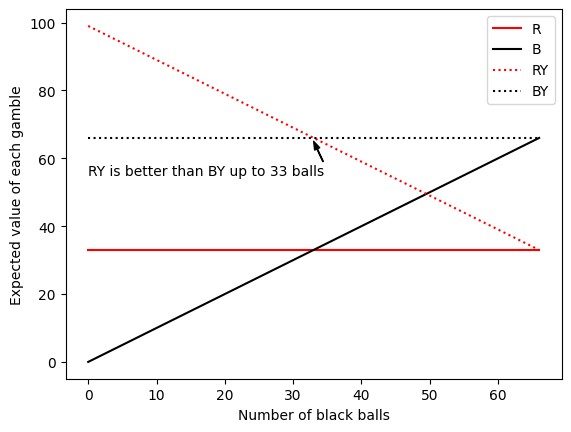

In [68]:

def ellsburg():
    fig, ax = plt.subplots()
    
    def show(colors, line):
        scores = [score(colors, urn) for urn in all_urns]
        ax.plot(blacks, scores, line, label=colors)
    
    show('R', 'r')
    show('B', 'k')
    show('RY', 'r:')
    show('BY', 'k:')
    plt.xlabel('Number of black balls')
    plt.ylabel('Expected value of each gamble')
    plt.legend(loc="upper right")
    
    ax.annotate('RY is better than BY up to 33 balls', xy=(33, 65), xytext=(0, 55),
                arrowprops=dict(facecolor='black', headlength=6, headwidth=4, width=0.4))


    
blacks   = list(range(67))
all_urns = [collections.Counter(R=33, B=b, Y=66-b) for b in blacks]
    
    
def score(colors, urn): return sum(urn[c] for c in colors)

ellsburg()

It is pretty clear that this holds for every possible mix of black and yellow
balls, taken one at a time. But what if you believe that the mix might be one of
several possibilities? For example, if we assume that any number of black balls
from 0 to 66 is equally likely, then we can use a function, `expected_score` to
give the expected return for a gamble (as specified by the colors in the
gamble), averaged over a collection of possible urns, each with a different
black/yellow mix:


In [69]:
def expected_score(colors, urns): 
    return sum(score(colors, urn) for urn in urns) / len(urns)

def compare(urns):
    for colors in ('R', 'B', 'RY', 'BY'):
        print(colors.ljust(2), expected_score(colors, urns))
        
compare(all_urns)

R  33.0
B  33.0
RY 66.0
BY 66.0


Now imagine that you believe that any mix is possible, but that a majority of
black balls is more likely, in particular that the urns in the second half of
the list of `all_urns` are twice as likely as those in the first half. Then we
will see that **B** > **R** and **BY** > **RY**:


In [70]:
compare(all_urns[:33] + 2 * all_urns[33:])

R  33.0
B  38.554455445544555
RY 60.445544554455445
BY 66.0


In [71]:
# and vice versa
compare(2 * all_urns[:33] + all_urns[33:])

R  33.0
B  27.39
RY 71.61
BY 66.0


This last time the preferences are reversed for both gambles, **R** > **B** and
**RY** > **BY**.

So why do many people prefer **R** > **B** and **BY** > **RY**? One explanation
is *risk aversion*; it feels safer to take a definite 1/3 chance of winning,
rather than a gamble that might be as good as 2/3, but might be as bad as 0.
This is irrational thinking (in the sense that those who follow this strategy
will win less), but people are sometimes irrational.


## Simpson's paradox (feat. The Simpsons)

[Edward Simpson](https://en.wikipedia.org/wiki/Edward_H._Simpson) noted in 1951
that it is possible to take a sample space in which **A** is better than **B**,
and split it into two groups, such that **B** is better than **A** in **both**
groups. The same applies to combining two groups.

With a Simpson's analogue, say Dr. Hibbert and Dr. Nick have the following
procedure history for heart surgery and band-aid removal:

<table>
  <tr>
    <td></td>
    <td colspan="2">Hibbert</td>
    <td colspan="2">Nick</td>
  </tr>
  <tr>
    <td ></td>
    <td >Heart</td>
    <td >Band-aid</td>
    <td >Heart</td>
    <td >Band-aid</td>
  </tr>
  <tr>
    <td >Success</td>
    <td >70</td>
    <td >10</td>
    <td >2</td>
    <td >81</td>
  </tr>
  <tr>
    <td >Failure</td>
    <td >20</td>
    <td >0</td>
    <td >8</td>
    <td >9</td>
  </tr>
</table>


In [72]:
# [heart, bandaid]
Hibbert = [Counter(success=70,  failure=20),  Counter(success=10, failure=0)]
Nick = [Counter(success=2, failure=8), Counter(success=81, failure=9)]

def success(case): return ProbDist(case)['success']

In [73]:
[success(case) for case in Hibbert]

[0.7777777777777778, 1.0]

In [74]:
[success(case) for case in Nick]

[0.2, 0.9]

We notice that Dr. Nick probably should not be not your go-to doctor, especially
for heart surgery. 

Let's check overall success rate, however:

In [75]:
success(Hibbert[0] + Hibbert[1]) > success(Nick[0] + Nick[1])

False

Surprisingly enough, Dr. Nick is overall more successful than Dr. Hibbert! And
has the math to prove it... Nevertheless, it is obvious to us that heart
surgery differs greatly from band-aid removal.

The same reasoning is applied to any "success rate" we can think of: difficult
cases will most likely bring the overall rate down due to failures and easy
ones will boost it... so we should be always wary of that.

# Simulations - When we cannot enumerate all possible outcomes

Sometimes it is inconvenient, difficult, or even impossible to explicitly
enumerate all possible outcomes. 
Perhaps the sample space is infinite, or perhaps it is just very large and complicated, with a bunch 
of low-probability outcomes that don't seem very important. In that case, we
might feel more confident in writing a program to *simulate* a random outcome.
*Random sampling* from such a simulation can give an accurate estimate of probability.

## Monopoly

Consider [problem 84](https://projecteuler.net/problem=84) from the excellent [Project Euler](https://projecteuler.net), which asks for the probability that a player in the game Monopoly ends a roll on each of the squares on the board.  To answer this we need to take into account die rolls, chance and community chest cards, and going to jail (from the "go to jail" space, from a card, or from rolling doubles three times in a row). We do not need to take into account anything about acquiring properties or exchanging money or winning or losing the game, because these events don't change a player's location. 

A game of Monopoly can go on forever, so the sample space is infinite. Even if we limit the sample space to say, 1000 rolls, there are $21^{1000}$ such sequences of rolls. So it is infeasible to explicitly represent the sample space. There are techniques for representing the problem as
a Markov decision problem (MDP) and solving it, but the math is complex (a [paper](https://faculty.math.illinois.edu/~bishop/monopoly.pdf) on the subject runs 15 pages).

The simplest approach is to implement a simulation and run it for, say, a million rolls.  Below is the code for a simulation. Squares are represented by integers from 0 to 39, and we define a global variable for each square: `GO`, `A1` (for the first property in the first monopoly), `CC1` (the first community chest square), and so on.  Wiithin the function `monopoly` the variable `loc` keeps track of where we are, and dice rolls and cards can alter the location. We use `visits[square]` to count how many times we end a roll on the square.

The trickiest part of the simulation is the cards: chance and community chest. We'll implement a deck of cards as a double-ended queue (so we can take cards from the top and put them on the bottom). Each card can be:
- A square, meaning to advance to that square (e.g., `R1` (square 5) means "take a ride on the Reading").
- A set of cards (e.g., `{R1, R2, R3, R4}` means "advance to nearest railroad").
- The number -3, which means "go back 3 squares".
- `'$'`, meaning the card has no effect on location, but involves money.



In [76]:
%matplotlib inline 
import matplotlib.pyplot as plt
import random
from collections import Counter, deque

# The Monopoly board, as specified by https://projecteuler.net/problem=84
board = """
 GO    A1  CC1  A2   T1  R1  B1   CH1  B2  B3 
 JAIL  C1  U1   C2   C3  R2  D1   CC2  D2  D3  
 FP    E1  CH2  E2   E3  R3  F1   F2   U2  F3  
 G2J   G1  G2   CC3  G3  R4  CH3  H1   T2  H2""".split()

for i, sq in enumerate(board): # Make the square names be global variables
    globals()[sq] = i
    
def Deck(cards):
    """A deck of cards; draw from the top and put it on bottom."""
    random.shuffle(cards)
    return deque(cards)
    
CC_cards = Deck([GO, JAIL] +  14 * ['$'])
CH_cards = Deck([GO, JAIL, C1, E3, H2, R1, -3, {U1, U2}]
                + 2 * [{R1, R2, R3, R4}] + 6 * ['$'])

def roll() -> int: return random.randint(1, 6)

def monopoly(rolls):
    """Simulate a number of dice rolls of a Monopoly game, 
    and return the counts of how often each square is visited."""
    visits = len(board) * [0]  # Counts of how many times each square is visited
    doubles = 0                # Number of consecutive doubles rolled
    loc = GO                   # Location on board
    for _ in range(rolls):
        d1, d2 = roll(), roll()
        doubles = ((doubles + 1) if d1 == d2 else 0)
        loc = (loc + d1 + d2) % len(board) # Roll, move ahead, maybe pass Go
        if loc == G2J or doubles == 3:
            loc = JAIL
            doubles = 0
        elif loc in (CC1, CC2, CC3):
            loc = do_card(CC_cards, loc)
        elif loc in (CH1, CH2, CH3):
            loc = do_card(CH_cards, loc)
        visits[loc] += 1
    return visits

def do_card(deck, loc):
    "Take the top card from deck and do what it says; return new location."
    card = deck[0]                        # The top card
    deck.rotate(1)                        # Move top card to bottom of deck
    return (loc if card == '$' else       # Don't move
            loc - 3 if card == -3 else    # Go back 3 spaces
            card if isinstance(card, int) # Go to destination named on card
            else min({s for s in card if s > loc} or card)) # Advance to nearest

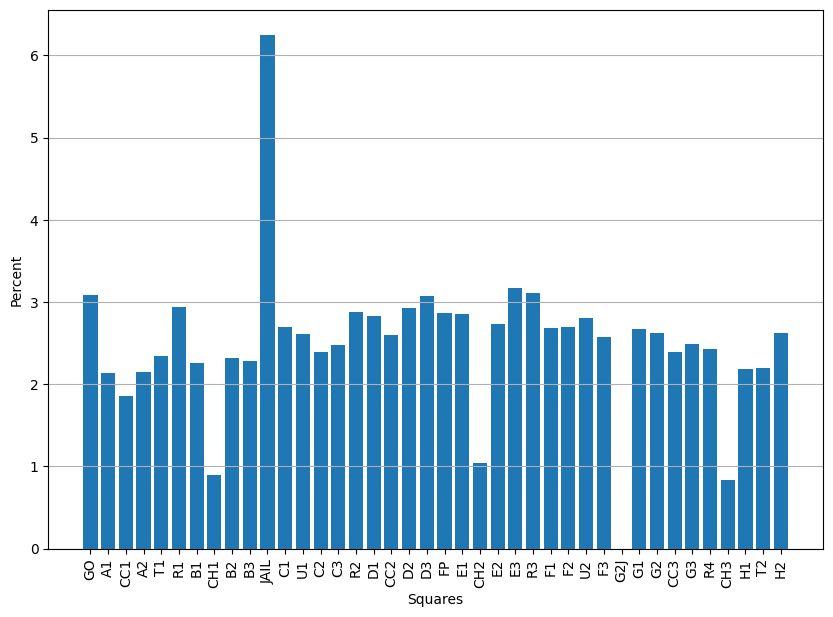

In [77]:
N = 10**6

visits = monopoly(N)

def bar(visits): 
    plt.rcParams["figure.figsize"] = [10, 7]
    plt.grid(axis='y')
    plt.xticks(range(40), board, rotation=90)
    plt.xlabel("Squares"); plt.ylabel("Percent")
    plt.bar(board, [100 * visits[s] / N for s in range(40)])
    
bar(visits)

If the squares were all visited equally, they'd each be 100% / 40 = 2.5%. In
actuality, we see that most of the squares are between about 2% and 3%, but a
few stand out:  `JAIL`is over 6%; `G2J` ("Go to Jail") is 0%, because you can't
end a roll there; and the three chance squares (`CH1`, `CH2`, and `CH3`) are
each at around 1%, because 10 of the 16 chance cards send the player away from
the square. 




## References

- Peter Norvig's [ipynb](https://github.com/norvig/pytudes/blob/main/ipynb)
- Harvard's [Stats 110](https://www.youtube.com/playlist?list=PL2SOU6wwxB0uwwH80KTQ6ht66KWxbzTIo)


## Resources and recommended reading

- More simulations:
    - [Pickeball](https://github.dev/norvig/pytudes/blob/main/ipynb/Pickleball.ipynb):
      solved ad-hoc by Norvig but seems like a good candidate for constraint
      programming at first sight.

- Statistics in a nutshell
- All of Statistics
- Stats Rethinking + [2nd Ed Python port](https://github.com/pymc-devs/pymc-resources/tree/main/Rethinking_2)